## Agricutural pests image classification

- The Agricultural Pest Image Dataset is a collection of images of 3 different types of agricultural pests, namely Ants, Bees, and Beetles.
- The images were obtained from Flickr using the API
- This ensures that the images in the dataset are representative of real-world scenarios and not artificially generated.

1. Remote Monitoring:
Through cameras, the model can identify, send data and alert farmers when a certain threshold is met. This allows for timely intervention, even when farmers are away.

1. Pest Management and Early Detection:
Identifying pests early in the agricultural scene is crucial for effective pest management. This can help prevent infestations, reduce crop damage, and allow for targeted intervention strategies.

1. Research and Data Collection:
The data collected through the model can contribute to research on pest populations, their distribution, and behavioral patterns. This data can help improve pest management strategies for the agricultural industry.

1. Biodiversity and Conservation:
Accurate identification of pests that appear is crucial for understanding the impact of such pests on the area's local ecosystems. Researchers can then assess the ecological impact and make informed decisions about conservation efforts.

### PreProcessing done

- used microsoft PowerToys to resize all pictures to have maximum dimensions of 200x200
- file names renamed to pestname_(x)
- label file created which indicates the pest type of every image used

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ADL/assignment23aug/threepests.zip

Archive:  /content/drive/MyDrive/ADL/assignment23aug/threepests.zip
   creating: threepests/pests/
   creating: threepests/pests/ants/
  inflating: threepests/pests/ants/ant_(0).jpg  
  inflating: threepests/pests/ants/ant_(1).png  
  inflating: threepests/pests/ants/ant_(10).jpg  
  inflating: threepests/pests/ants/ant_(100).jpg  
  inflating: threepests/pests/ants/ant_(101).jpg  
  inflating: threepests/pests/ants/ant_(102).jpg  
  inflating: threepests/pests/ants/ant_(103).jpg  
  inflating: threepests/pests/ants/ant_(104).jpg  
  inflating: threepests/pests/ants/ant_(105).jpg  
  inflating: threepests/pests/ants/ant_(106).jpg  
  inflating: threepests/pests/ants/ant_(107).jpg  
  inflating: threepests/pests/ants/ant_(108).jpg  
  inflating: threepests/pests/ants/ant_(109).jpg  
  inflating: threepests/pests/ants/ant_(11).jpg  
  inflating: threepests/pests/ants/ant_(110).jpg  
  inflating: threepests/pests/ants/ant_(111).jpg  
  inflating: threepests/pests/ants/ant_(112).jpg  
  in

In [ ]:

import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
label_df = pd.read_csv("threepests/pests/pestsLabel.csv")


## Data exploration

In [ ]:
print(f'Total number of images is {label_df.shape[0]}')
print(f'Number of classes is \n {label_df.label.value_counts()}')

Total number of images is 1415
Number of classes is 
 bees      500
ants      499
beetle    416
Name: label, dtype: int64


> The dataset is balanced where all classes have similar number of images.

In [ ]:
label_df.head()

,images,label
0,ants/ant_(0).jpg,ants
1,ants/ant_(1).png,ants
2,ants/ant_(10).jpg,ants
3,ants/ant_(100).jpg,ants
4,ants/ant_(101).jpg,ants


#### Split data into training and testing datasets of 80:20

In [ ]:
# split data into training and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(label_df, test_size=0.2, random_state=0)

# Separate out our target values
y_train = train['label'].reset_index(drop=True)
y_test = test['label'].reset_index(drop=True)

# Separate out image paths
x_train = train['images'].reset_index(drop=True)
x_test = test['images'].reset_index(drop=True)

print('size of training set is ', len(x_train))
print('size of test set is ', len(x_test))

size of training set is  1132
size of test set is  283


#### Convert text labels into one hot encoded form

It is not enough to convert the labels into numbers, as this dataset contains more than 2 classes. Hence, to convert the labels into binary values, it is neccessary to perform one hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
print('Original labels: \n',y_train[:5])

# Fit and transform the label column
y_train_labelled = label_encoder.fit_transform(y_train)
y_test_labelled = label_encoder.fit_transform(y_test)
print('Transform labels into numerical values: ',y_train_labelled[:5])

# Turn our scalar targets into binary categories
num_classes = 3
y_train = keras.utils.to_categorical(y_train_labelled, num_classes)
y_test = keras.utils.to_categorical(y_test_labelled, num_classes)
print('Transform labels into binary categories: \n',y_train[:5])

Original labels: 
 0      bees
1      ants
2      bees
3    beetle
4      bees
Name: label, dtype: object
Transform labels into numerical values:  [1 0 1 2 1]
Transform labels into binary categories: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


*   ants : 0
*   bees : 1
*   beetle : 2



#### Preprocess images

1. Reshape images to be suitable for input to the CNN : 1, 224, 224, 3

In [ ]:
x_train

0           bees/bees_(131).jpg
1            ants/ant_(466).jpg
2           bees/bees_(199).jpg
3       beetle/beetle_(341).jpg
4           bees/bees_(442).jpg
                 ...           
1127        bees/bees_(337).jpg
1128        bees/bees_(401).jpg
1129    beetle/beetle_(297).jpg
1130        bees/bees_(153).jpg
1131        bees/bees_(266).jpg
Name: images, Length: 1132, dtype: object

process training images

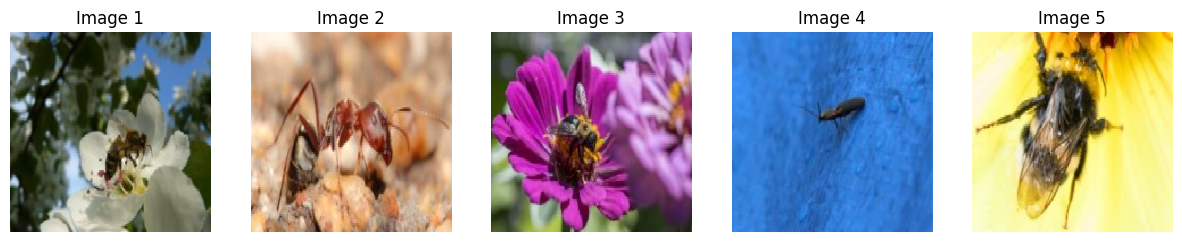

Shape of reshaped batch: (1132, 224, 224, 3)


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


shortImages = []

for i in x_train:
  # Load and preprocess the image using TensorFlow (you can replace this with your image loading code)
  image = tf.keras.preprocessing.image.load_img(f'threepests/pests/{i}', target_size=(224, 224))
  image_array = tf.keras.preprocessing.image.img_to_array(image)
  normalized_image_array = image_array / 255.0
  shortImages.append(normalized_image_array)


# Stack the images to create a batch
batch_images = np.stack(shortImages, axis=0)

# Reshape the batch of images for input into a CNN
x_train = tf.reshape(batch_images, shape=(-1, 224, 224, 3))

# Display a few preprocessed images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Image {i + 1}")
    plt.axis("off")
plt.show()

print("Shape of reshaped batch:", x_train.shape)

preprocess test images

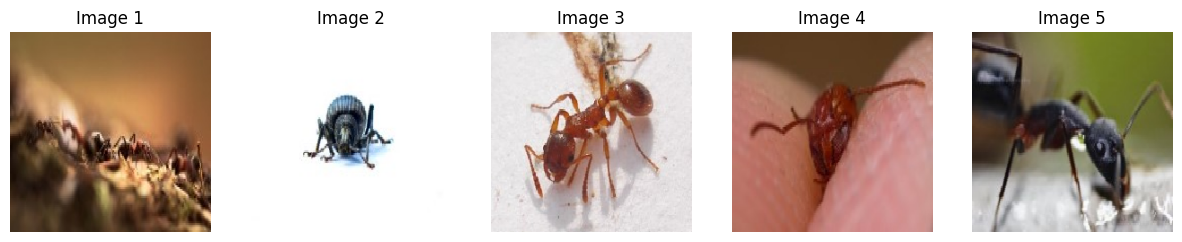

Shape of reshaped batch: (283, 224, 224, 3)


In [ ]:
shortImages = []

for i in x_test:
  # Load and preprocess the image using TensorFlow (you can replace this with your image loading code)
  image = tf.keras.preprocessing.image.load_img(f'threepests/pests/{i}', target_size=(224, 224))
  image_array = tf.keras.preprocessing.image.img_to_array(image)
  normalized_image_array = image_array / 255.0
  shortImages.append(normalized_image_array)


# Stack the images to create a batch
batch_images = np.stack(shortImages, axis=0)

# Reshape the batch of images for input into a CNN
x_test = tf.reshape(batch_images, shape=(-1, 224, 224, 3))

# Display a few preprocessed images
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Image {i + 1}")
    plt.axis("off")
plt.show()

print("Shape of reshaped batch:", x_test.shape)

> I chose to use a target size of 224 by 224 to capture a more precise image of the pests. A size of any lesser decreased the quality of images too much that it negatively affects the performance of the model.


## Create the convulational neural network for classifying the images

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(10, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 75)      2100      
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 75)     300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 75)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 50)      33800     
                                                                 
 dropout_3 (Dropout)         (None, 112, 112, 50)      0         
                                                                 
 batch_normalization_5 (Batc  (None, 112, 112, 50)    

- 4 convulational layers produce the best performance, as it allows the model to capture low-level features and high-level features as data is passed through the layers.
- setting padding="same", ensures that output feature maps will have the same dimensions as input feature maps. This makes it easier to stack multiple convulational layers without varying in image size thorghout layers.
- dropout layers are added to regularize the model. This helps to prevent overfitting and produce a model that is able to generalize well on unseen data.
- batch normalization is added to normalize the data and maintains the mean output close to 0 and the output standard deviation close to 1. This helps mitigate the vanshing gradient problem and allows for higher learning rates.
- The dense layers at the end of the model perform classification. The first dense layer (512 units) acts as a high-level feature extractor by combining information from the flattened feature maps. Dropout is then used to further regularize the network and prevent overfitting. The final dense layer outputs probabilities for each class using the softmax activation function.


Save the model in case of future imrpvoements to training process

In [ ]:
model.save('initial_model')

## Train the model

optimize the model using Stochastic Gradient Descent (SGD) optimizer
- through trial and error, it is discovered that learning rate of 0.02 and 0.85 produced the best results

In [ ]:
#Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.85)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
36/36 [==============================] - 10s 239ms/step - loss: 1.7500 - accuracy: 0.4037 - val_loss: 1.2644 - val_accuracy: 0.4488
Epoch 2/20
36/36 [==============================] - 8s 226ms/step - loss: 0.9322 - accuracy: 0.5380 - val_loss: 1.3216 - val_accuracy: 0.4629
Epoch 3/20
36/36 [==============================] - 8s 227ms/step - loss: 0.8272 - accuracy: 0.6316 - val_loss: 1.3985 - val_accuracy: 0.4700
Epoch 4/20
36/36 [==============================] - 8s 226ms/step - loss: 0.7207 - accuracy: 0.6829 - val_loss: 1.0123 - val_accuracy: 0.5300
Epoch 5/20
36/36 [==============================] - 8s 228ms/step - loss: 0.6328 - accuracy: 0.7350 - val_loss: 1.3617 - val_accuracy: 0.4240
Epoch 6/20
36/36 [==============================] - 8s 225ms/step - loss: 0.5580 - accuracy: 0.7739 - val_loss: 1.5395 - val_accuracy: 0.4488
Epoch 7/20
36/36 [==============================] - 8s 225ms/step - loss: 0.4436 - accuracy: 0.8339 - val_loss: 1.1325 - val_accuracy: 0.5583
Epoch

plot loss and validation loss comparison chart

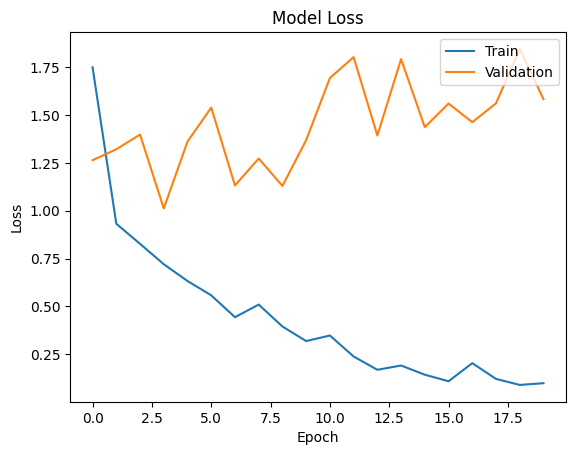

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

> From the high accuracy and low validation accuracy, it is evident that the model is overfitting. one reason for this owuld be the small amount of data

Hence, I will perform data augmentation to generate more data, to generalize the model and allow it to be translation invarient.

## Data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

In [ ]:
datagen.fit(x_train)

use SGD optimizer with learning_rate=0.02 and momentum=0.85

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.85)

# load the model
model2 = keras.models.load_model('initial_model')
model2.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Use early stopping callback to stop training when there is no improvement after x number of epochs
> When previously trained on all 20 epochs, i noticed a difference in accuracy from the first 10 epochs and the last few epochs. Hence, to avoid performance decay over many epochs with large amounts of training data, i used the early stopping callback function

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, verbose=0,
    mode='auto', restore_best_weights=True)

Train the model with data augmentation

In [ ]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

history = model2.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_test, y_test),
          callbacks=[earlystop_callback])

Epoch 1/20
35/35 [==============================] - 19s 520ms/step - loss: 0.8740 - accuracy: 0.5671 - val_loss: 0.7577 - val_accuracy: 0.6961
Epoch 2/20
35/35 [==============================] - 18s 511ms/step - loss: 0.8618 - accuracy: 0.5866 - val_loss: 0.8473 - val_accuracy: 0.6078
Epoch 3/20
35/35 [==============================] - 17s 472ms/step - loss: 0.8423 - accuracy: 0.6007 - val_loss: 0.7592 - val_accuracy: 0.6537
Epoch 4/20
35/35 [==============================] - 16s 460ms/step - loss: 0.8580 - accuracy: 0.6007 - val_loss: 0.8836 - val_accuracy: 0.5901
Epoch 5/20
35/35 [==============================] - 16s 459ms/step - loss: 0.8650 - accuracy: 0.5910 - val_loss: 0.8197 - val_accuracy: 0.6643
Epoch 6/20
35/35 [==============================] - 16s 454ms/step - loss: 0.8254 - accuracy: 0.6175 - val_loss: 0.7607 - val_accuracy: 0.6466


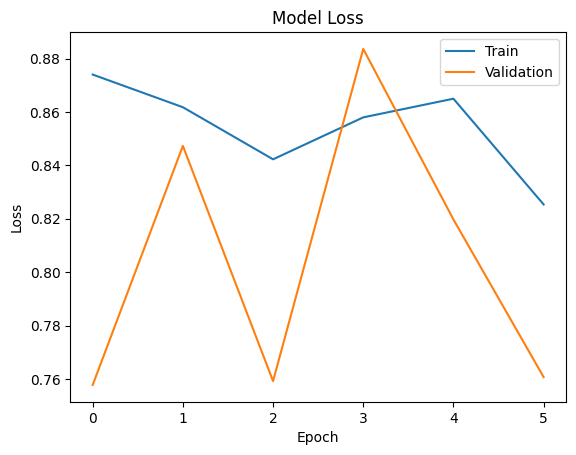

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


> After using data generator to produce augmented images, the model is no longer overfitting. Hence, there is no need for L2 regularization

## Evaluation

In [ ]:
x_test.shape

TensorShape([283, 224, 224, 3])

In [ ]:
y_test[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
y_test_labelled[0]

0

Predict test dataset on model2 - model trained with data augmentation

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils


y_preds = []
y_labels = []
for i, img in enumerate(x_test[:100]): # limit to 100 to prevent excessive usage of RAM
    img = tf.reshape(img, shape=(1, 224, 224, 3))
    preds = model2.predict(img)
    y_preds.append(np.argmax(preds))
    y_labels.append(y_test_labelled[i])


1/1 [==============================] - 0s 18ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_labels, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        38
           1       0.90      0.70      0.79        37
           2       0.76      0.52      0.62        25

    accuracy                           0.74       100
   macro avg       0.77      0.71      0.72       100
weighted avg       0.77      0.74      0.74       100



In [ ]:
unique, counts = np.unique(y_train_labelled, return_counts=True)

print('Class counts in training dataset \n',np.asarray((unique, counts)).T)

Class counts in training dataset 
 [[  0 389]
 [  1 400]
 [  2 343]]


> When the model is stoped as accuracy starts to decreased, it produces a relatively good performance, where it achieved a testing accuracy of 74%

The models ability to predict each class is most likely related to the amount of training data.
- As seen from the confusion matrix and count of each class in the training data, class 2 has the highest number of values, and also the highest F1-score.
- whereas class 2 has the least number of values and also the lowest F1-score.


> This shows that the current model will perform better on larger training datsets. When paired with the early callback stopping function, a robust model that does not overfit and is translation invarient can be achieved.
---

